In [1]:
import pandas as pd
import pprint as pp

In [2]:
from inc import stop_words as sw
from inc import extra_stopwords as esw

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [7]:
from sqlalchemy import create_engine
table_name = 'Training_set'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [8]:
df = pd.read_sql_table(table_name, engine)

2020-12-16 05:36:39,077 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-16 05:36:39,078 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 05:36:39,080 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-16 05:36:39,080 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 05:36:39,082 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-16 05:36:39,083 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 05:36:39,085 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-16 05:36:39,085 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 05:36:39,087 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Training_set")
2020-12-16 05:36:39,088 INFO sqlalchemy.engine.base.Engine ()
2020-12-16 05:36:39,090 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNI

In [9]:
df = df.rename(columns={"class": "label"})

In [10]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [11]:
train = df.sample(frac=0.8,random_state=200) #random state is a seed value
test = df.drop(train.index)

In [12]:
model.fit(train.abstract, train.label)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [13]:
labels = model.predict(test.abstract)

In [28]:
pp.pprint(labels)

array(['15', '10', '15', '2', '10', '2', '17', '7', '10', '10', '10', '3',
       '10', '10', '2', '9', '10', '10', '2', '10', '6', '10', '9', '10',
       '16', '2', '15', '4', '10', '6', '14', '11', '15', '15', '10',
       '10', '10', '10', '15', '10', '10', '13', '10', '15', '11', '12',
       '9', '10', '2', '10', '15', '15', '10', '10', '14', '15', '7', '3',
       '6', '15', '11', '12', '15', '11', '10', '10', '11', '10', '17',
       '7', '11', '2', '10', '11', '11', '10', '10', '10', '12', '10',
       '10', '2', '10', '12', '2', '10', '10', '15', '11', '15', '10',
       '10', '11', '10', '9', '12', '11', '10', '10', '12', '10', '12',
       '10', '10', '9', '15', '10', '15', '15', '14', '10', '11', '15',
       '10', '14', '10', '10', '10', '10', '2', '10', '16', '12', '11',
       '10', '17', '11', '10', '10', '10', '10', '10', '10', '10', '10',
       '11', '2', '10', '10', '17', '10', '15', '10', '10', '4', '10',
       '16', '10', '17', '2', '10', '10', '3', '15', '6', '

In [30]:
pp.pprint(test.label)

0       13
10       8
15      15
17       6
18       9
        ..
1501     2
1504     5
1505    10
1508     6
1524    13
Name: label, Length: 307, dtype: object


In [15]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.label, labels)

In [31]:
pp.pprint(mat)

array([[10,  0,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6, 10,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  3, 11,  0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  2,  0,  2],
       [16,  3,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 9,  1,  2,  1,  4,  5,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 15,  0,  0,  1,  0,  0,  0,  2,  0,  0,  0],
       [14,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [15,  0,  0,  0,  0,  2,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0, 14,  0,  0,  0,  0,  1,  0,  0],
       [10,  0,  0,  0,  1,  1,  0,  1,  5,  8,  0,  0,  0,  0,  0,  0],
       [11,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [10,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  1,  1,  1,  0,  2,  0,  0,  0,  5,  0,  0,  0],
       [ 8,  2,  3,  0,  0,  2,  0,  0,  4,  0,  0,

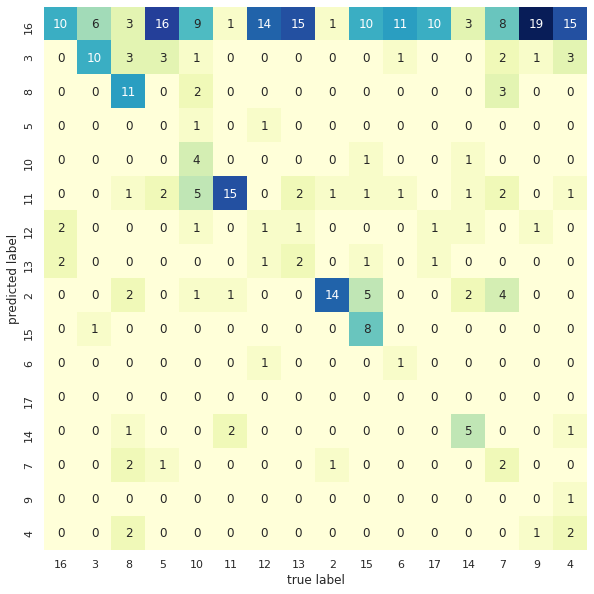

In [33]:
sns.set(style="white", color_codes=True)
plt.subplots(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.label.unique(), yticklabels=train.label.unique(),cmap="YlGnBu")

plt.xlabel('true label')
plt.ylabel('predicted label');

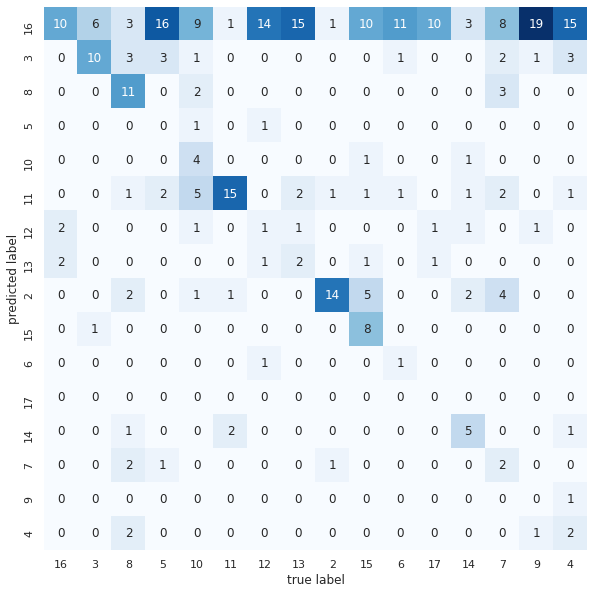

In [34]:
plt.subplots(figsize=(10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.label.unique(), yticklabels=train.label.unique(),cmap="Blues")

plt.xlabel('true label')
plt.ylabel('predicted label');